In [1]:
# This script gathers data from OzWald and SILO for a single location over the specified years

In [2]:
# I'm using python 3.9
# !pip install jupyter jupytext xarray pandas scipy cftime

In [1]:
# Standard Libraries
import os

# Dependencies
import pandas as pd
import xarray as xr

# Local imports
os.chdir(os.path.join(os.path.expanduser('~'), "Projects/PaddockTS"))
from DAESIM_preprocess.ozwald_8day import ozwald_8day, ozwald_8day_abbreviations
from DAESIM_preprocess.ozwald_daily import ozwald_daily, ozwald_daily_abbreviations
from DAESIM_preprocess.anuclimate_daily import anuclimate_multivariable
from DAESIM_preprocess.silo_daily import silo_daily, silo_abbreviations

['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']


In [2]:
# Specify the location and years
latitude = -34.52194
longitude=148.30472
buffer = 0.0000000001 # Single point
start_year = 2000
end_year = 2019

In [3]:
%%time  

# Annoyingly the OzWald variables each use slightly different grid systems, hence we separate the requests
ds_ozwald_daily1 = ozwald_daily(["VPeff", "Uavg"], latitude, longitude, buffer, start_year, end_year)
ds_ozwald_daily2 = ozwald_daily(["Tmax", "Tmin"], latitude, longitude, buffer, start_year, end_year)
ds_ozwald_daily3 = ozwald_daily(["Pg"], latitude, longitude, buffer, start_year, end_year)

# Took 1 minute (15 seconds per variable per year)

Downloaded _VPeff_2000.nc
Downloaded _VPeff_2001.nc
Downloaded _VPeff_2002.nc
Downloaded _VPeff_2003.nc
Downloaded _VPeff_2004.nc
Downloaded _VPeff_2005.nc
Downloaded _VPeff_2006.nc
Downloaded _VPeff_2007.nc
Downloaded _VPeff_2008.nc
Downloaded _VPeff_2009.nc
Downloaded _VPeff_2010.nc
Downloaded _VPeff_2011.nc
Downloaded _VPeff_2012.nc
Downloaded _VPeff_2013.nc
Downloaded _VPeff_2014.nc
Downloaded _VPeff_2015.nc
Downloaded _VPeff_2016.nc
Downloaded _VPeff_2017.nc
Downloaded _VPeff_2018.nc
Downloaded _VPeff_2019.nc
Downloaded _Uavg_2000.nc
Downloaded _Uavg_2001.nc
Downloaded _Uavg_2002.nc
Downloaded _Uavg_2003.nc
Downloaded _Uavg_2004.nc
Downloaded _Uavg_2005.nc
Downloaded _Uavg_2006.nc
Downloaded _Uavg_2007.nc
Downloaded _Uavg_2008.nc
Downloaded _Uavg_2009.nc
Downloaded _Uavg_2010.nc
Downloaded _Uavg_2011.nc
Downloaded _Uavg_2012.nc
Downloaded _Uavg_2013.nc
Downloaded _Uavg_2014.nc
Downloaded _Uavg_2015.nc
Downloaded _Uavg_2016.nc
Downloaded _Uavg_2017.nc
Downloaded _Uavg_2018.nc
Downl

(array([6.873e+03, 2.740e+02, 8.600e+01, 3.600e+01, 1.700e+01, 1.100e+01,
        4.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([ 0.        ,  7.71161413, 15.42322826, 23.13484192, 30.84645653,
        38.55807114, 46.26968384, 53.98130035, 61.69291306, 69.40452576,
        77.11614227]),
 <BarContainer object of 10 artists>)

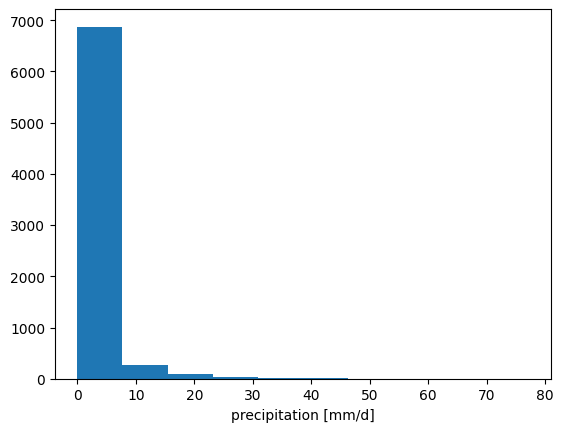

In [44]:
ds_ozwald_daily3['Pg'].plot()

In [4]:
%%time  

# Fetch 8day variables from ozwald
ds_ozwald_8day = ozwald_8day(["Ssoil", "Qtot", "LAI", "GPP"], latitude, longitude, buffer, start_year, end_year)
ds_ozwald_8day

# Took 11 seconds (1 second per variable per year)

Saved: /scratch/xe2/cb8590/Test_ozwald_8day.nc
CPU times: user 22.1 s, sys: 2.76 s, total: 24.9 s
Wall time: 1min


<xarray.Dataset>
Dimensions:    (time: 920)
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01 2000-01-09 ... 2019-12-27
    latitude   float32 -34.52
    longitude  float32 148.3
Data variables:
    Ssoil      (time) float32 332.6 328.1 323.4 333.4 ... 323.5 321.2 319.6
    Qtot       (time) float32 2.009e-05 7.863e-06 ... 1.909e-06 1.671e-06
    LAI        (time) float32 0.43 0.43 0.43 0.43 0.43 ... 0.35 0.32 0.28 0.23
    GPP        (time) float32 0.3638 0.2965 0.279 ... 0.1028 0.07314 0.03721
Attributes:
    creator_name:   ANU Centre for Water and Landscape Dynamics
    creator_url:    http://wald.anu.edu.au
    creator_email:  albert.vandijk@anu.edu.au
    institution:    Australian National University
    date_created:   26-Feb-2020
    description:    This product was derived by the ANU OzWALD model-data fus...
    ANU_license:    Creative Commons with Attribution (https://creativecommon...

In [5]:
# # %%time  

# # # Fetch daily variables from anuclimate (takes much longer because the files are stored monthly instead of yearly)
# # df_anuclimate = anuclimate_multivariable(["rain", "tmin", "tmax", "srad"], latitude, longitude, years)
# years = [str(year) for year in list(range(int(start_year), int(end_year) + 1))]
# df_anuclimate = anuclimate_multivariable(["srad"], latitude, longitude, years)
# df_anuclimate.head()

# # # Took 5 mins (30 secs per variable per year)

In [6]:
# %%time
# ds_silo_daily = silo_daily(["radiation", "et_morton_actual", "et_morton_potential", "et_short_crop", "et_tall_crop"], latitude, longitude, buffer, start_year, end_year)
ds_silo_daily = silo_daily(["radiation"], latitude, longitude, buffer, start_year, end_year)
ds_silo_daily

# Took about 10 secs (because its pre-downloaded to gdata)

Saved: _silo_daily.nc


<xarray.Dataset>
Dimensions:    (time: 7305)
Coordinates:
    lat        float64 -34.5
    lon        float64 148.3
  * time       (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2019-12-31
Data variables:
    radiation  (time) float32 24.7 28.2 31.0 32.5 31.0 ... 24.9 27.1 30.2 22.6
    crs        (time) |S1 b'' b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b'' b''
Attributes:
    department:               Department of Environment and Science
    department_short:         DES
    copyright:                Copyright - the State of Queensland Department ...
    site_url:                 http://www.longpaddock.qld.gov.au
    institution:              Queensland Government, Department of Environmen...
    metadata_url:             http://qldspatial.information.qld.gov.au/catalo...
    reference:                Jeffrey, S.J., Carter, J.O., Moodie, K.B.A. and...
    disclaimer:               1. The user accepts all responsibility and risk...
    raster_source:            Bureau of Meteorology. Modified by the Queensla...
    NCO:                      netCDF Operators version 4.9.1 (Homepage = http...
    raster_source_additions:  Gridded surface was created by interpolating ob...

In [84]:
# Remove the coordinates before merging, since we are looking at a single point location
ds1 = ds_ozwald_daily1.max(dim=['latitude','longitude'])
ds2 = ds_ozwald_daily2.max(dim=['latitude','longitude'])
ds3 = ds_ozwald_daily3.max(dim=['latitude','longitude'])
ds4 = ds_ozwald_8day.drop_vars(['latitude', 'longitude'])
ds5 = ds_silo_daily.drop_vars(['lat', 'lon'])

In [80]:
# Combine the datasets along the 'time' dimension
ds_merged = xr.merge([ds1, ds2, ds3, ds4, ds5])

In [81]:
df = ds_merged.to_dataframe().reset_index()
df = df.drop(columns=["crs"])
df = df.set_index('time')

In [82]:
# Rename the columns to match Alex's DAESim_forcing.csv
abbreviations = {
    "Pg" : "Precipitation",
    "Tmax" : "Maximum temperature",
    "Tmin" : "Minimum temperature",
    "Ssoil":"Soil moisture",
    "Qtot":"Runoff",
    "LAI":"Vegetation leaf area",
    "GPP":"Vegetation growth",
    "radiation":"SRAD",
    }
df.rename(columns=abbreviations, inplace=True)
df.rename_axis("date", inplace=True)
df_Alex_ordering = df[["Precipitation", "Runoff", "Minimum temperature", "Maximum temperature", "Soil moisture", "Vegetation growth", "Vegetation leaf area", "VPeff",	"Uavg", "SRAD"]] 
df.to_csv("DAESim_forcing_Harden_2000-2019.csv")
df.head()

,VPeff,Uavg,Maximum temperature,Minimum temperature,Precipitation,Soil moisture,Runoff,Vegetation leaf area,Vegetation growth,SRAD
date,,,,,,,,,,
2000-01-01,11.081753,3.733983,22.43,10.96,0.00000,332.55188,0.00002,0.43,0.363775,24.700001
2000-01-02,13.537492,3.445135,24.05,13.50,0.00000,NaN,NaN,NaN,NaN,28.200001
2000-01-03,13.906050,3.815608,28.30,19.46,0.00000,NaN,NaN,NaN,NaN,31.000000
2000-01-04,10.290228,6.005404,23.05,8.95,1.87874,NaN,NaN,NaN,NaN,32.500000
2000-01-05,10.601977,4.204366,21.66,9.39,0.00000,NaN,NaN,NaN,NaN,31.000000
